In [1]:
!pip3 install excel2json

In [2]:
import pandas as pd
import yaml
import numpy as np
import json
import seaborn as sns
#import excel2json

In [11]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel("entry_with_patient_and_one_intruder_20230116-150853.xlsx")
df = df.to_json()
df = json.loads(df)
for key,value in df.items():
  value.pop('Unnamed: 0',None)
df2 = pd.DataFrame.from_dict(df,orient='columns')
# Convert the DataFrame to a CSV file
df2.to_csv("entry_with_patient_and_one_intruder_20230116-150853.csv", index=False)

AttributeError: 'dict' object has no attribute 'to_csv'

In [21]:
del df['Unnamed: 0']

In [73]:
a = dict(df2['0'])
a['0']

"{'crc': True, 'captured_by': [{'0': {'00000000dedd8941': -79, '0000000090de2ebf': -77, '10000000f01b4c9d': -84, '00000000e4540cab': -79, '0000000053816128': -72, '00000000ccfdc71e': -85}, '1': {'0000000028c7b980': -87, '00000000dedd8941': -81, '0000000090de2ebf': -79, '10000000f01b4c9d': -82, '00000000e4540cab': -83, '0000000053816128': -81, '00000000ccfdc71e': -88}}, {'0': {'0000000028c7b980': -85, '00000000dedd8941': -85, '0000000090de2ebf': -79, '10000000f01b4c9d': -82, '00000000e4540cab': -79, '00000000ccfdc71e': -85}, '1': {'00000000e4540cab': -79}}], 'captured_at': '2023-01-16T14:06:31.083Z', 'type': 'THERMAL_ROI', 'roi': '27292829282627272D2C2E3B352A2A2A2F2D313E382D2C2D2F303033322F2D2C3231313331302D2F31303132322F2F3135313232313031313735353433323335', 'version': 1}"

Thermal raw readings: [19.75, 20.25, 20.0, 20.25, 20.0, 19.5, 19.75, 19.75, 21.25, 21.0, 21.5, 24.75, 23.25, 20.5, 20.5, 20.5, 21.75, 21.25, 22.25, 25.5, 24.0, 21.25, 21.0, 21.25, 21.75, 22.0, 22.0, 22.75, 22.5, 21.75, 21.25, 21.0, 22.5, 22.25, 22.25, 22.75, 22.25, 22.0, 21.25, 21.75, 22.25, 22.0, 22.25, 22.5, 22.5, 21.75, 21.75, 22.25, 23.25, 22.25, 22.5, 22.5, 22.25, 22.0, 22.25, 22.25, 23.75, 23.25, 23.25, 23.0, 22.75, 22.5, 22.75, 23.25]
Decoded TOF data:
 [[22.55 22.74 22.41 22.77 22.41 21.75 22.13 22.03]
 [22.87 22.77 22.86 26.42 25.08 22.09 21.96 21.87]
 [22.65 22.63 23.17 26.49 24.99 22.5  22.08 22.24]
 [22.46 22.69 22.94 23.41 23.12 22.43 22.2  21.87]
 [22.76 22.66 22.86 23.1  22.9  22.56 22.05 22.18]
 [22.61 22.47 22.73 22.68 22.69 22.19 22.05 22.33]
 [22.73 22.28 22.31 22.35 22.52 22.04 22.2  22.25]
 [22.97 22.36 22.53 22.37 22.2  22.2  22.36 22.37]]





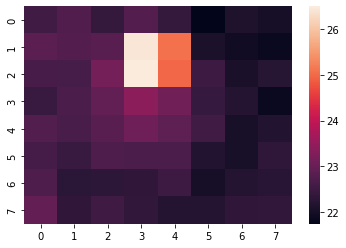

In [76]:

# Thermal data will be inside JSON packets that contain the keyword 'type' with value 'THERMAL_ROI'
json_string = a['0']
# 1) Convert string to JSON
json_dict = yaml.load(json_string, Loader=yaml.FullLoader)
# print(json.dumps(json_dict, indent=4))
# 2) Thermal data is saved under the keyword 'roi'
thermal_roi_values = json_dict['roi']
# 3) Data is saved in a hex string like before. It is sent in increments of 0.25 degrees starring from a minimum value of 10
thermal_roi_values = [10+int(x+y,16)*.25 for x,y in zip(thermal_roi_values[::2], thermal_roi_values[1::2])]
# 4) When standing at the base of the base faving it, the readings are top-left to bottom-right
thermal_data_matrix = np.array(thermal_roi_values).reshape((8, 8))
# 5) The readings have internal noise. To correct it we add a bias. This is a fixed value
THERMAL_BIAS = [
    [ 2.8,   2.49,  2.41,  2.52,  2.41,  2.25,  2.38,  2.28],
    [ 1.62,  1.77,  1.36,  1.67,  1.83,  1.59,  1.46,  1.37],
    [ 0.9,   1.38,  0.92,  0.99,  0.99,  1.25,  1.08,  0.99],
    [ 0.71,  0.69,  0.94,  0.66,  0.62,  0.68,  0.95,  0.87],
    [ 0.26,  0.41,  0.61,  0.35,  0.65,  0.56,  0.8,   0.43],
    [ 0.36,  0.47,  0.48,  0.18,  0.19,  0.44,  0.3,   0.08],
    [-0.52,  0.03, -0.19, -0.15,  0.27,  0.04, -0.05,  -0  ],
    [-0.78, -0.89, -0.72, -0.63, -0.55, -0.3,  -0.39, -0.88]
]
thermal_data_matrix = thermal_data_matrix + THERMAL_BIAS
# Result
print('Thermal raw readings:', thermal_roi_values)
print('Decoded TOF data:\n', thermal_data_matrix)
print('\n\n')
sns.heatmap(thermal_data_matrix)

In [77]:
# Load the Excel file into a pandas DataFrame
df = pd.read_excel("/content/entry_with_patient_and_two_people_around_20230116-151320.xlsx")
df = df.to_json()
df = json.loads(df)
for key,value in df.items():
  value.pop('Unnamed: 0',None)
df2 = pd.DataFrame.from_dict(df,orient='columns')
# Convert the DataFrame to a CSV file
# df.to_csv("/content/entry_with_patient_and_one_intruder_20230116-150853.csv", index=False)

In [83]:
df2

,Unnamed: 0,0
0,0,"{'seconds': 4416, 'error_state': '00', 'pir_da..."
1,1,"{'seconds': 4425, 'error_state': '00', 'pir_da..."
2,2,"{'seconds': 4426, 'error_state': '00', 'pir_da..."
3,3,"{'seconds': 4444, 'error_state': '00', 'pir_da..."
4,4,"{'seconds': 4448, 'error_state': '00', 'pir_da..."
...,...,...
119,119,"{'seconds': 4638, 'error_state': '00', 'pir_da..."
120,120,"{'seconds': 4640, 'error_state': '00', 'pir_da..."
121,121,"{'seconds': 4641, 'error_state': '00', 'pir_da..."
122,122,"{'crc': True, 'captured_by': [{'0': {'00000000..."


In [88]:
df2._get_value('122','0')

"{'crc': True, 'captured_by': [{'0': {'0000000028c7b980': -86, '00000000dedd8941': -78, '0000000090de2ebf': -78, '00000000e4540cab': -84}, '1': {'0000000028c7b980': -85, '00000000dedd8941': -81, '0000000090de2ebf': -78, '00000000e4540cab': -80}}, {'0': {'0000000028c7b980': -84, '00000000dedd8941': -78, '0000000090de2ebf': -79, '00000000e4540cab': -79, '0000000053816128': -79}, '1': {'0000000090de2ebf': -77}}], 'captured_at': '2023-01-16T14:12:56.385Z', 'type': 'THERMAL_ROI', 'roi': '26282628272427272B2C2D3B342A2A2A2E2C303D362C2B2B2F2F2E32302D2C2C30302F302E2E2C2E302E3031302E2F30333031312F2F30313635353333313234', 'version': 1}"

Thermal raw readings: [19.5, 20.0, 19.5, 20.0, 19.75, 19.0, 19.75, 19.75, 20.75, 21.0, 21.25, 24.75, 23.0, 20.5, 20.5, 20.5, 21.5, 21.0, 22.0, 25.25, 23.5, 21.0, 20.75, 20.75, 21.75, 21.75, 21.5, 22.5, 22.0, 21.25, 21.0, 21.0, 22.0, 22.0, 21.75, 22.0, 21.5, 21.5, 21.0, 21.5, 22.0, 21.5, 22.0, 22.25, 22.0, 21.5, 21.75, 22.0, 22.75, 22.0, 22.25, 22.25, 21.75, 21.75, 22.0, 22.25, 23.5, 23.25, 23.25, 22.75, 22.75, 22.25, 22.5, 23.0]
Decoded TOF data:
 [[22.3  22.49 21.91 22.52 22.16 21.25 22.13 22.03]
 [22.37 22.77 22.61 26.42 24.83 22.09 21.96 21.87]
 [22.4  22.38 22.92 26.24 24.49 22.25 21.83 21.74]
 [22.46 22.44 22.44 23.16 22.62 21.93 21.95 21.87]
 [22.26 22.41 22.36 22.35 22.15 22.06 21.8  21.93]
 [22.36 21.97 22.48 22.43 22.19 21.94 22.05 22.08]
 [22.23 22.03 22.06 22.1  22.02 21.79 21.95 22.25]
 [22.72 22.36 22.53 22.12 22.2  21.95 22.11 22.12]]





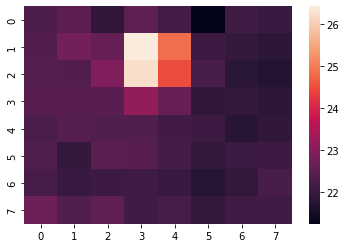

In [89]:
json_string = df2._get_value('122','0')
# 1) Convert string to JSON
json_dict = yaml.load(json_string, Loader=yaml.FullLoader)
# print(json.dumps(json_dict, indent=4))
# 2) Thermal data is saved under the keyword 'roi'
thermal_roi_values = json_dict['roi']
# 3) Data is saved in a hex string like before. It is sent in increments of 0.25 degrees starring from a minimum value of 10
thermal_roi_values = [10+int(x+y,16)*.25 for x,y in zip(thermal_roi_values[::2], thermal_roi_values[1::2])]
# 4) When standing at the base of the base faving it, the readings are top-left to bottom-right
thermal_data_matrix = np.array(thermal_roi_values).reshape((8, 8))
# 5) The readings have internal noise. To correct it we add a bias. This is a fixed value
THERMAL_BIAS = [
    [ 2.8,   2.49,  2.41,  2.52,  2.41,  2.25,  2.38,  2.28],
    [ 1.62,  1.77,  1.36,  1.67,  1.83,  1.59,  1.46,  1.37],
    [ 0.9,   1.38,  0.92,  0.99,  0.99,  1.25,  1.08,  0.99],
    [ 0.71,  0.69,  0.94,  0.66,  0.62,  0.68,  0.95,  0.87],
    [ 0.26,  0.41,  0.61,  0.35,  0.65,  0.56,  0.8,   0.43],
    [ 0.36,  0.47,  0.48,  0.18,  0.19,  0.44,  0.3,   0.08],
    [-0.52,  0.03, -0.19, -0.15,  0.27,  0.04, -0.05,  -0  ],
    [-0.78, -0.89, -0.72, -0.63, -0.55, -0.3,  -0.39, -0.88]
]
thermal_data_matrix = thermal_data_matrix + THERMAL_BIAS
# Result
print('Thermal raw readings:', thermal_roi_values)
print('Decoded TOF data:\n', thermal_data_matrix)
print('\n\n')
sns.heatmap(thermal_data_matrix)

In [92]:
# Read the Excel file 
df = pd.read_excel("/content/nopatient_with_upto_two_people_entering_20230116-152400.xlsx") 
# Load the Excel file into a pandas DataFrame
df = df.to_json()
df = json.loads(df)
for key,value in df.items():
  value.pop('Unnamed: 0',None)
df2 = pd.DataFrame.from_dict(df,orient='columns')
# Convert the DataFrame to a CSV file

In [93]:
df2

,Unnamed: 0,0
0,0,"{'seconds': 5194, 'error_state': '00', 'pir_da..."
1,1,"{'seconds': 5195, 'error_state': '00', 'pir_da..."
2,2,"{'crc': True, 'captured_by': [{'0': {'00000000..."
3,3,"{'luminance': 61, 'battery_voltage': 4268, 'ro..."
4,4,"{'seconds': 5206, 'error_state': '00', 'pir_da..."
...,...,...
76,76,"{'seconds': 5281, 'error_state': '00', 'pir_da..."
77,77,"{'seconds': 5285, 'error_state': '00', 'pir_da..."
78,78,"{'seconds': 5286, 'error_state': '00', 'pir_da..."
79,79,"{'crc': True, 'captured_by': [{'0': {'00000000..."


Thermal raw readings: [19.0, 19.25, 18.75, 18.75, 18.5, 18.5, 19.25, 19.0, 20.0, 20.25, 20.25, 20.5, 20.0, 19.75, 20.0, 20.0, 21.0, 20.5, 21.0, 21.25, 21.25, 20.5, 20.5, 20.25, 21.25, 21.25, 21.0, 21.75, 21.75, 21.0, 20.75, 20.5, 21.75, 21.75, 21.5, 22.0, 21.5, 21.5, 21.0, 21.0, 21.25, 21.25, 21.75, 22.25, 22.0, 21.5, 21.5, 21.75, 22.25, 21.75, 22.0, 22.0, 21.75, 22.0, 21.75, 21.75, 23.0, 23.0, 22.5, 22.5, 23.0, 22.75, 22.25, 22.75]
Decoded TOF data:
 [[21.8  21.74 21.16 21.27 20.91 20.75 21.63 21.28]
 [21.62 22.02 21.61 22.17 21.83 21.34 21.46 21.37]
 [21.9  21.88 21.92 22.24 22.24 21.75 21.58 21.24]
 [21.96 21.94 21.94 22.41 22.37 21.68 21.7  21.37]
 [22.01 22.16 22.11 22.35 22.15 22.06 21.8  21.43]
 [21.61 21.72 22.23 22.43 22.19 21.94 21.8  21.83]
 [21.73 21.78 21.81 21.85 22.02 22.04 21.7  21.75]
 [22.22 22.11 21.78 21.87 22.45 22.45 21.86 21.87]]





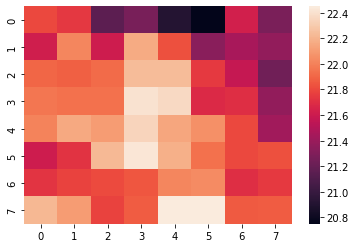

In [95]:
json_string = df2._get_value('2','0')
# 1) Convert string to JSON
json_dict = yaml.load(json_string, Loader=yaml.FullLoader)
# print(json.dumps(json_dict, indent=4))
# 2) Thermal data is saved under the keyword 'roi'
thermal_roi_values = json_dict['roi']
# 3) Data is saved in a hex string like before. It is sent in increments of 0.25 degrees starring from a minimum value of 10
thermal_roi_values = [10+int(x+y,16)*.25 for x,y in zip(thermal_roi_values[::2], thermal_roi_values[1::2])]
# 4) When standing at the base of the base faving it, the readings are top-left to bottom-right
thermal_data_matrix = np.array(thermal_roi_values).reshape((8, 8))
# 5) The readings have internal noise. To correct it we add a bias. This is a fixed value
THERMAL_BIAS = [
    [ 2.8,   2.49,  2.41,  2.52,  2.41,  2.25,  2.38,  2.28],
    [ 1.62,  1.77,  1.36,  1.67,  1.83,  1.59,  1.46,  1.37],
    [ 0.9,   1.38,  0.92,  0.99,  0.99,  1.25,  1.08,  0.99],
    [ 0.71,  0.69,  0.94,  0.66,  0.62,  0.68,  0.95,  0.87],
    [ 0.26,  0.41,  0.61,  0.35,  0.65,  0.56,  0.8,   0.43],
    [ 0.36,  0.47,  0.48,  0.18,  0.19,  0.44,  0.3,   0.08],
    [-0.52,  0.03, -0.19, -0.15,  0.27,  0.04, -0.05,  -0  ],
    [-0.78, -0.89, -0.72, -0.63, -0.55, -0.3,  -0.39, -0.88]
]
thermal_data_matrix = thermal_data_matrix + THERMAL_BIAS
# Result
print('Thermal raw readings:', thermal_roi_values)
print('Decoded TOF data:\n', thermal_data_matrix)
print('\n\n')
sns.heatmap(thermal_data_matrix)